# Data Set 2 - Texas road network

## Dataset Description :
This is a road network of Texas. Intersections and endpoints are represented by nodes, and the roads connecting these intersections or endpoints are represented by edges.

### Finding Random Sample

In the original network, there are 1379917 nodes and 1921660 edges. Since it is a very huge network , we used a random sample in order to get the inferences.

In [1]:
#finding random sample
import os
import random

filename = 'wiki-Talk.txt'

result = []
f = open("data.txt", "a")

with open(filename) as fh:
    data = fh.readlines()
    for line in data:
        if line:
            words = line.split()
            result.append(words)

sample = random.sample(result, 1000)

for item in sample:
    f.write(item[0] + "   " + item[1] + "\n")

Now using the above random sample , we will read the graph G from the list of edges ('data.txt') and find the general information about the graph.

In [27]:
import networkx as nx

#reading graph from list of edges
G=nx.read_edgelist('data.txt',nodetype=int,create_using=nx.DiGraph())

#general information about the graph
print (nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1746
Number of edges: 3623
Average in degree:   2.0750
Average out degree:   2.0750


#### Basic Information about graph:
From here , we can see that the graph generated has 1746 nodes and 3623 edges. It is a directed graph and average in degree & out degree are 2.0750 (fraction) .

### Graph Representation


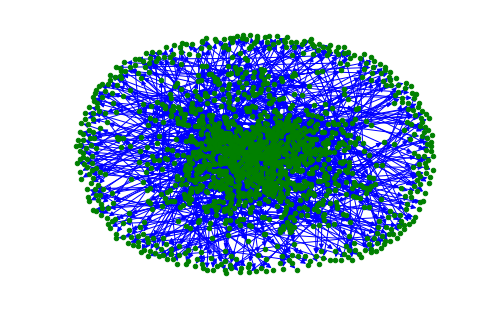

In [28]:
import matplotlib.pyplot as plt

# drawing graph
nx.draw(G, pos=None, node_color='g', edge_color='b',node_size=20)
plt.show()


In the graph , nodes are represented by green colour and directed edges are represented by blue colour.

### Degree Distribution

We will now try to find how 

Text(0.5,1,'Degree Distribution')

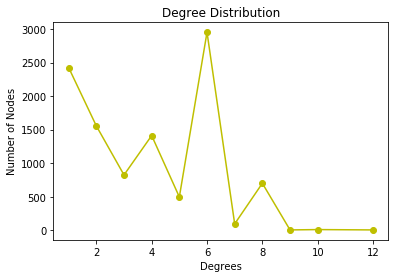

In [81]:
#d=dict()
for x,y in nx.degree(G):
    if y not in d:
        d[y]=1
    else:
        d[y]+=1
#for x in d:
    #print(x,d[x])
plt.plot(d.keys(),d.values(),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")

It can be observed that most of the nodes have degree '6' . This means that 6 roads passes through most of the roads.

### Density Calculation
A graph is  more dense if the number of edges is close to the number of maximal edges possible.
Density is calculated as the ratio of edges in network to maximal edges possible.

In [67]:
#calculating density
print (nx.density(G))

0.00118912815867


The density is 0.001189 . Thus , it is a sparse graph

### Local Clustering Coeffecient

It measures the immediate neighbour connectivity of a node.

In [78]:
#getting average local clustering coeffecient
print "Average Local Clustering Coeffecient is:"
print nx.average_clustering(G)

#printing local clustering coeffecient of all nodes
w=1
#for i in (nx.clustering(G).items()):
print "Some of the nodes with their clustering coeffecient are:"
print("Node    Local Clustering Coeffecient")
for p,r in nx.clustering(G).items():
    if(p==88):
        w=w+1
        print (str(p)+"\t"+str(r))
    elif(w>=2 and w<7):
        w=w+1
        print (str(p)+"\t"+str(r))
    elif(w>7):
        break        

Average Local Clustering Coeffecient is:
0.0318649464955
Some of the nodes with their clustering coeffecient are:
Node    Local Clustering Coeffecient
88	0
89	0
90	0.166666666667
91	0.333333333333
92	0
93	0.166666666667


In the dictionary , first element gives node number and 2nd element gives 
We get average local clustering as 0.03186. 
This means that if node A has roads to a group of nodes, then no 2 nodes are connected by a road most of the time. 

### Global Clustering Coeffecient
It measures the fraction of all possible triangles present in G.

In [69]:
#printing global clustering coeffecient of nodes
print "The Golbal Clustering Coeffecient is:"
print(nx.transitivity(G))

The Golbal Clustering Coeffecient is:
0.0464488252768


The Global Transitivity is 0.0464. 
It means that some triangles are present in Graph G.That means, if node A is connected to node B by a road and node B is directly connected to node C by a road , then it happens sometimes that node A has a road to node C. 

### Reciprocity

The reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph.

In [70]:
print nx.reciprocity(G)

0.874965498206


The reciprocity is 0.8749. This means that most of the roads are bidirectional. 

## Centrality Measures
Centrality measures indicate how important a node is in a graph. Following are the different Centrality Measures:

### 1. Degree Cenrality
It computes degree of all nodes in graph. 

We observe that the highest in-degree is "6". This means that this node acts as a junction with maximum connectivity.

In [76]:
dict1=G.degree()
print "The nodes with maximum degree is :"
i= max(nx.out_degree_centrality(G),key=(nx.out_degree_centrality(G)).get)

val=dict1[i]
print("Node    Degree")
for p,r in dict1:
    if (r==val):
        print (str(p)+"\t"+str(r))
        
print (" ")
print "List of some nodes with their degree:"
w=1
for p,r in dict1:
    if(w<=5):
        print(str(p)+"\t"+str(r))
        w=w+1


The nodes with maximum degree is :
Node    Degree
219	12
 
List of some nodes with their degree:
0	6
1	6
2	6
3	6
4	6


The maximum degree is "12" which is associated with node 216.This mean this node acts as a junction and has maximum connectivity.

### Eigen Vector Centrality :

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is
                    Ax=λx
 where A is the adjacency matrix of the graph G with eigenvalue λ.
 
Since "influential" node is irrelevant to this network, we won't calculate it.

### Betweenness Centrality:

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.


In [60]:
dict =nx.betweenness_centrality(G)
i= max(nx.betweenness_centrality(G),key=(nx.betweenness_centrality(G)).get)
#print i,dict[i]
print("Node    Betweenness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node    Closeness Centrality
436	0.0792040523436
476	0.0782095053678
565	0.0767475903726
564	0.0767265604312
563	0.0767009870419


Node 436 has highest Between Centrality meausure. It means that most of the shortest paths passes through this node(considering weight of all edges as 1). 

### Closeness Centrality

Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes.

In [77]:
dict= nx.closeness_centrality(G, u=None, distance=None, wf_improved=True, reverse=False)
i= max(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True, reverse=False),key=(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True, reverse=False)).get)
#print i,dict[i]
print("Node    Closeness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node    Closeness Centrality
476	0.0186759310163
565	0.0186402047016
564	0.018609690759
566	0.0185957385645
436	0.0185843386839


Node 476 has the highest Closeness Centrality measure.It means that from this node , we can reach other nodes very quickly.

### Conclusion

1. In the original network, there are  1379917 nodes and 1921660 edges edges. Since it is a very huge network , we used a random sample in order to get the inferences.
2. Intersections and endpoints are represented by nodes, and the roads connecting these intersections or endpoints are represented by edges.
3. It can be observed that if node A has roads to a group of nodes, then no 2 nodes are connected by a road most of the time.
4. Most of the roads are bidirectional. 
5. Most of the shortest paths passes through the node having highest betweenness centrality measure(considering weight of all edges as 1). 







# Round 2

We will generate graphs using G(n,p) model where n(no. of nodes) = 500. We will vary ⟨k⟩ from 0 to 5 with increment of 0.1. For each value of ⟨k⟩,we will find the ratio Ng/N where N is the number of nodes in the graph. Later, we will plot this ratio with respect to ⟨k⟩ taking ⟨k⟩ as x-axis and ratio Ng/N as y-axis. 

In [9]:
import networkx as nx

a=[]
n=500

for k in range (51):
    #calculating probability
    p= (1.0)*(k)/(10.0*(n-1))
    #generating graph based on G(n,p) model
    G1=(nx.gnp_random_graph(n, p, seed=None, directed=False))
    #finding the giant component Ng
    giant = max(nx.connected_component_subgraphs(G1), key=len)
    #calculating Ng/N ratio
    a.append(1.0*(giant.number_of_nodes())/(1.0*n))

#List containing all the ratios Ng/N for each average degree <k>  
print ("Ratios Ng/N :")
print a

Ratios Ng/N :
[0.002, 0.006, 0.008, 0.008, 0.018, 0.01, 0.014, 0.084, 0.03, 0.186, 0.132, 0.312, 0.216, 0.158, 0.456, 0.644, 0.662, 0.71, 0.666, 0.792, 0.8, 0.806, 0.83, 0.87, 0.886, 0.89, 0.882, 0.948, 0.942, 0.936, 0.944, 0.948, 0.962, 0.96, 0.958, 0.97, 0.942, 0.984, 0.964, 0.976, 0.972, 0.976, 0.988, 0.984, 0.974, 0.986, 0.986, 0.976, 0.99, 0.994, 0.99]


In [8]:
import matplotlib.pyplot as plt
b=[]

#storing all the average degrees <k> in list b
for i in range(0,51):
    b.append(i/10.0)
    
print ("Average degrees :")
print b

Average degrees :
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


Here, we have made a list of all the required average degree values

Text(0.5,1,'Evolution of Random Network')

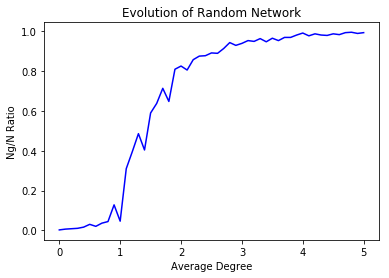

In [5]:
#Plotting graph between <k> and ratio Ng/N
plt.plot(b,a,'-b')

#X-axis label
plt.xlabel("Average Degree")
#Y-axis label
plt.ylabel("Ng/N Ratio")
#Plot title
plt.title("Evolution of Random Network")

The plot obtained is almost exponential in nature.Ng/N remains zero for small ‹k›, indicating the lack of a large cluster. Once ‹k› exceeds a critical value (k=1), Ng/N increases, signaling the rapid emergence of a large cluster that we call the giant component.